In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r'C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/processed_fb_ad_camps.csv')

In [43]:
df.head()

,Ad_ID,Company_Campaign_ID,FB_campaign_ID,Age,Gender,interest,Impressions,Clicks,Spent,Total_Conversion,Ctr,Cpc,Conversion_Rate,Cpa
0,708746,916,103916,32,M,15,7350,1,1.43,2,0.000136,1.43,2.0,0.715
1,708749,916,103917,32,M,16,17861,2,1.82,2,0.000112,0.91,1.0,0.910
2,708771,916,103920,32,M,20,693,0,0.00,1,0.000000,0.00,0.0,0.000
3,708815,916,103928,32,M,28,4259,1,1.25,1,0.000235,1.25,1.0,1.250
4,708818,916,103928,32,M,28,4133,1,1.29,1,0.000242,1.29,1.0,1.290


In [44]:
df.describe()

,Ad_ID,Company_Campaign_ID,FB_campaign_ID,Age,interest,Impressions,Clicks,Spent,Total_Conversion,Ctr,Cpc,Conversion_Rate,Cpa
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,38.321085,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.000164,1.227812,0.241699,16.016721
std,1.939928e+05,121.629393,20500.308622,5.903868,26.952131,3.127622e+05,56.892438,86.908418,4.483593,0.000115,0.614889,0.368381,24.297504
min,7.087460e+05,916.000000,103916.000000,32.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,32.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000100,1.234500,0.028571,1.380000
50%,1.121185e+06,1178.000000,144549.000000,37.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,0.000160,1.450000,0.090909,8.190000
75%,1.121804e+06,1178.000000,144657.500000,42.000000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,0.000234,1.600000,0.250000,21.229286
max,1.314415e+06,1178.000000,179982.000000,47.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,0.001059,2.212000,4.000000,332.989999


In [45]:
df.Gender.value_counts()

Gender
M    592
F    551
Name: count, dtype: int64

In [25]:
#Check for null values
df.isnull().sum()

Ad_ID                     0
Company_Campaign_ID    1143
FB_campaign_ID            0
Age                       0
Gender                    0
interest                  0
Impressions               0
Clicks                    0
Spent                     0
Total_Conversion          0
Ctr                       0
Cpc                       0
Conversion_Rate           0
Cpa                       0
dtype: int64

In [ ]:
#Checking the different company campaign IDs to see the unique campaigns
df.Company_Campaign_ID.value_counts()

Company_Campaign_ID
1178    625
936     464
916      54
Name: count, dtype: int64

In [90]:
#Renaming them for ease of use
df['Company_Campaign_ID'].replace({
    1178: 'Campaign 1',
    936: 'Campaign 2',
    916: 'Campaign 3',
    
}, inplace=True)

Data Visualization

Text(0.5, 1.0, 'Age Distribution')

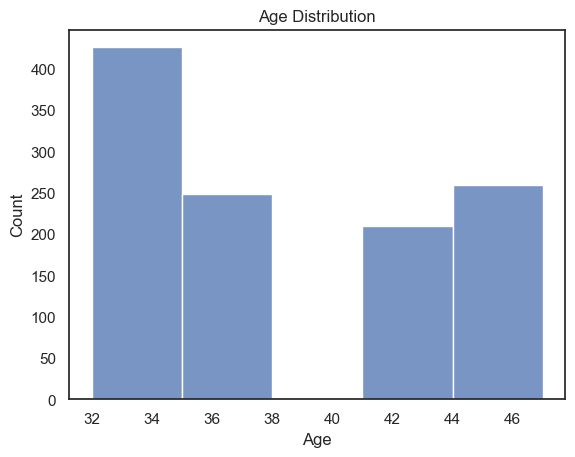

In [55]:
#Check for age distribution
sns.histplot(df['Age'], bins=5)
plt.title('Age Distribution')

We can see a little skewness to the right, might have to normalize it.

Text(0.5, 1.0, 'Gender Distribution')

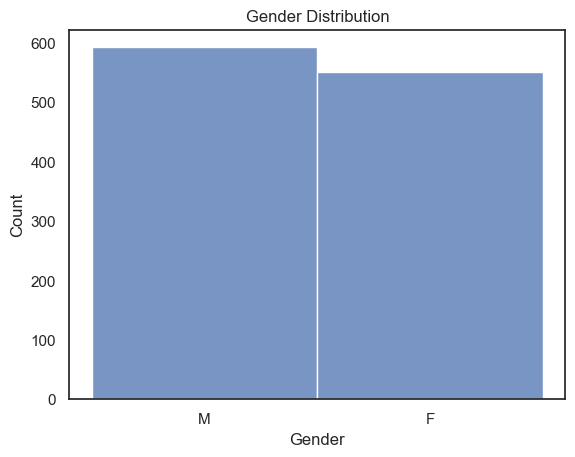

In [24]:
#Check gender distribution
sns.histplot(df['Gender'])
plt.title('Gender Distribution')

In [28]:
df.columns

Index(['Ad_ID', 'Company_Campaign_ID', 'FB_campaign_ID', 'Age', 'Gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Ctr',
       'Cpc', 'Conversion_Rate', 'Cpa'],
      dtype='object')

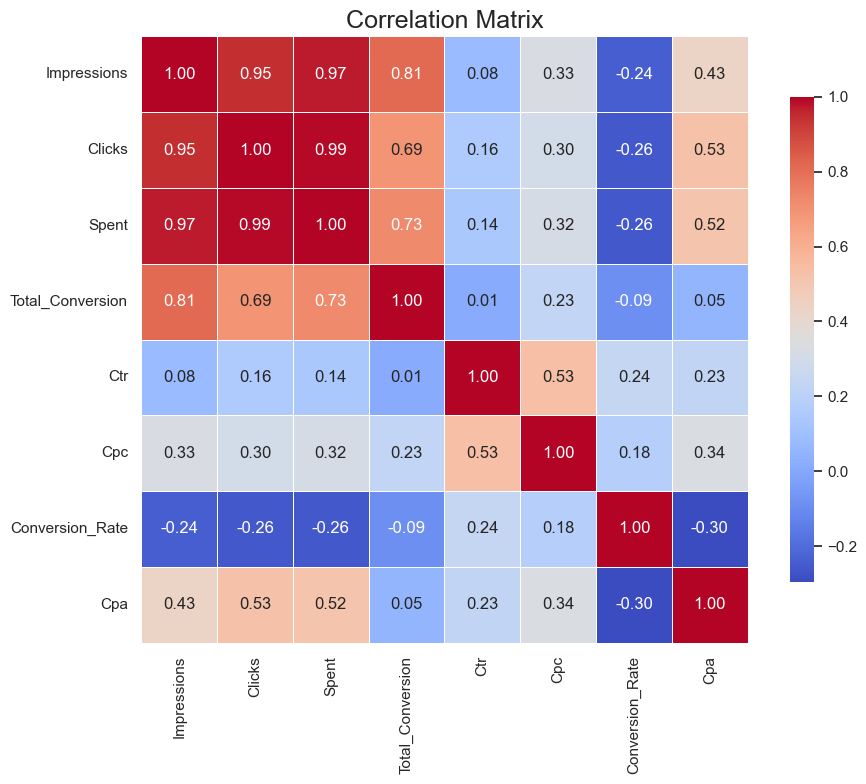

In [ ]:
#Correlation matrix to visualize the relationships between variables
sns.set_theme(style="white")

df_corr = df[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Ctr', 'Cpc', 'Conversion_Rate', 'Cpa']]
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                      linewidths=0.5, linecolor='white', square=True,
                      cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix', size=18)
plt.tight_layout()

We can see that we have very strong correlations between 'Impressions', 'Clicks', 'Spent' and 'Total_Conversion'. 
We will check for Variance Inflation Factor to see if these correlations will be problematic or not.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_corr.columns
vif_data["VIF"] = [variance_inflation_factor(df_corr.values, i) for i in range(len(df_corr.columns))]
print(vif_data)


            feature         VIF
0       Impressions   54.715101
1            Clicks  133.649017
2             Spent  237.844469
3  Total_Conversion    6.450555
4               Ctr    5.101945
5               Cpc    6.822680
6   Conversion_Rate    1.887312
7               Cpa    3.161400


We can see a ver large VIF number for Impressions, Clicks and Spent, which indicates severe multicollinearity. 
We will have to keep that in mind when we're at the model building stage.

Now, let's breakdown Impressions, Clicks and Total Conversions per Age per Campaign

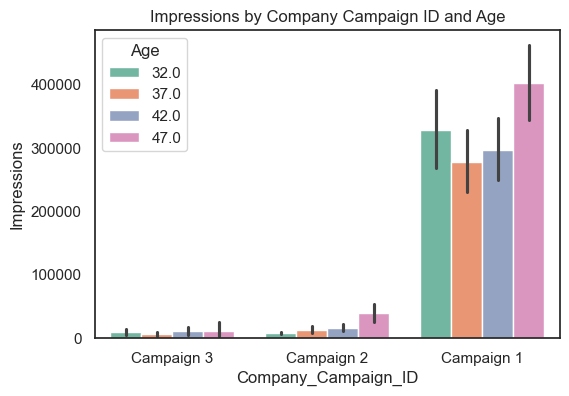

In [92]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company_Campaign_ID', y='Impressions', data=df, hue='Age', palette='Set2')
plt.title('Impressions by Company Campaign ID and Age')
plt.show()

The age 47 has the most impressions, meaning that they've seen the ads the most.

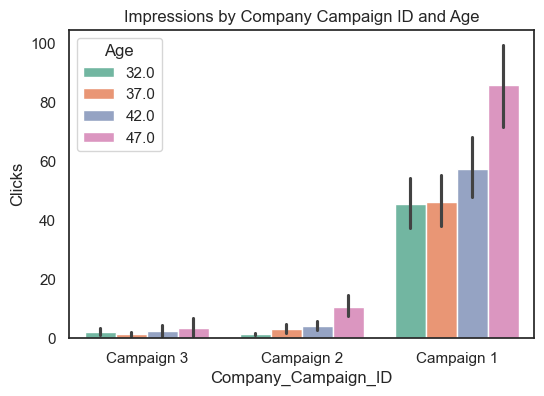

In [93]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company_Campaign_ID', y='Clicks', data=df, hue='Age', palette='Set2')
plt.title('Impressions by Company Campaign ID and Age')
plt.show()

The age 47 has the most clicks, meaning they'ce clicked on the ads the most

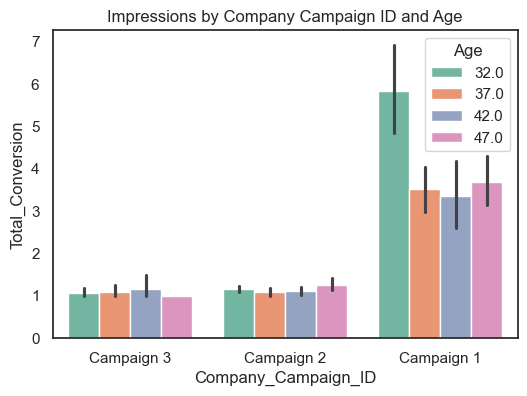

In [94]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company_Campaign_ID', y='Total_Conversion', data=df, hue='Age', palette='Set2')
plt.title('Impressions by Company Campaign ID and Age')
plt.show()

Despite age 47 having the most Impressions and clicks, the age 32 has the most total conversions.

Let's break these features by gender

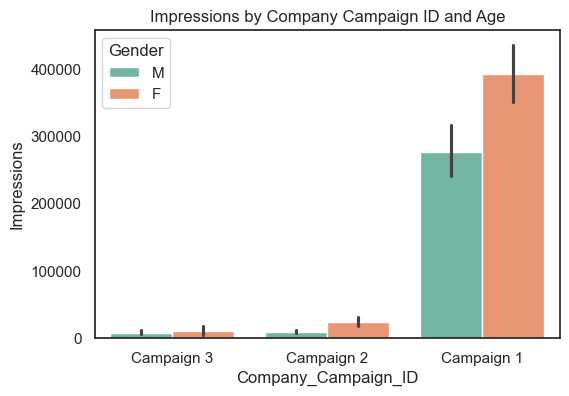

In [95]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company_Campaign_ID', y='Impressions', data=df, hue='Gender', palette='Set2')
plt.title('Impressions by Company Campaign ID and Age')
plt.show()

Females have the most Impressions accross all campaigns

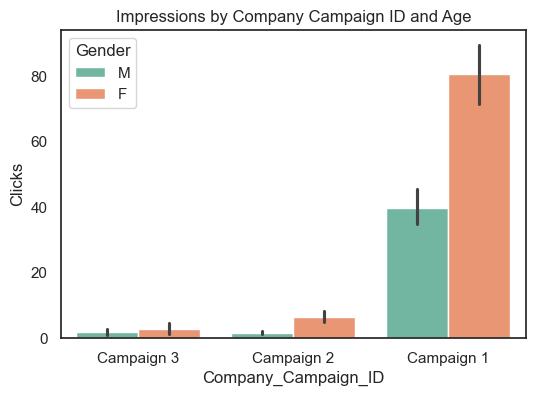

In [97]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company_Campaign_ID', y='Clicks', data=df, hue='Gender', palette='Set2')
plt.title('Impressions by Company Campaign ID and Age')
plt.show()

Females have the most clicks.

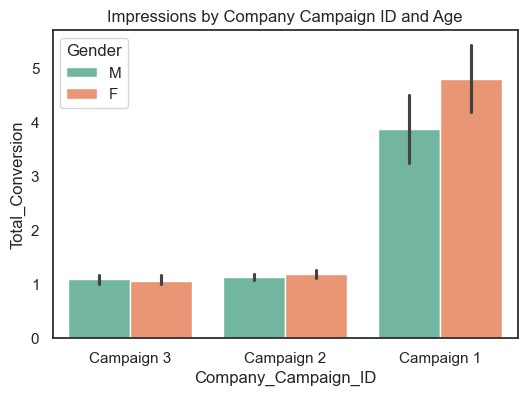

In [99]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Company_Campaign_ID', y='Total_Conversion', data=df, hue='Gender', palette='Set2')
plt.title('Impressions by Company Campaign ID and Age')
plt.show()

Females have the most conversions in campaign 1, but male and female conversion are more or less equal in campaigns 2 and 3.

Now we will visualize the distribution of the numerical values of our dataset.

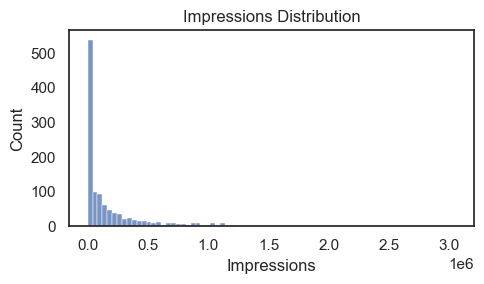

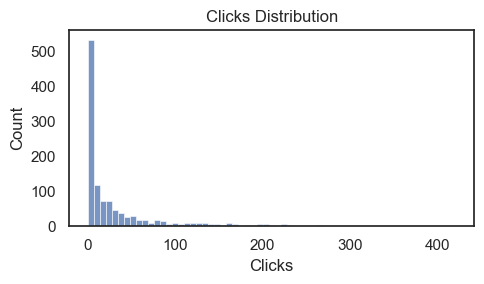

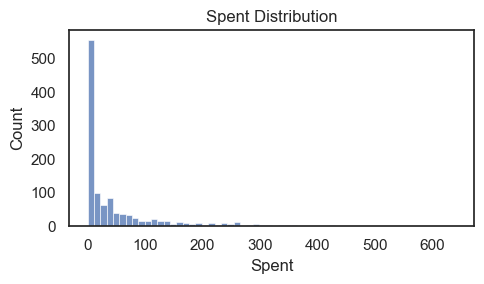

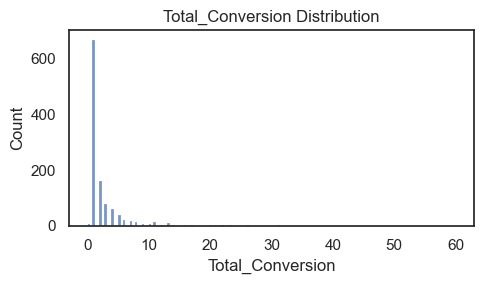

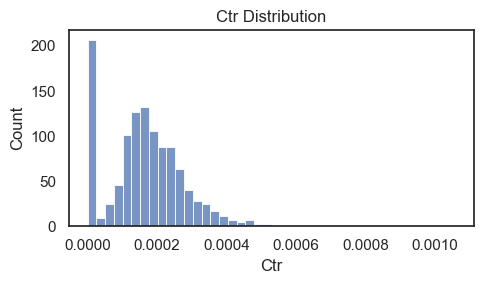

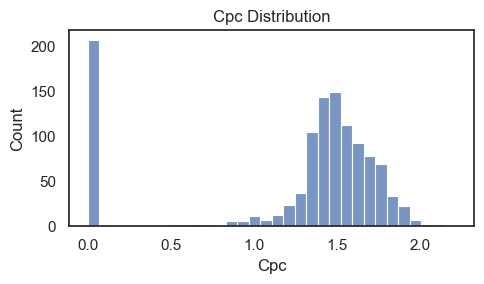

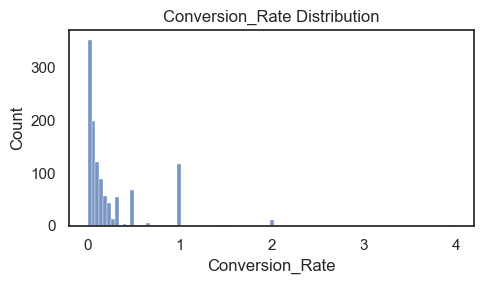

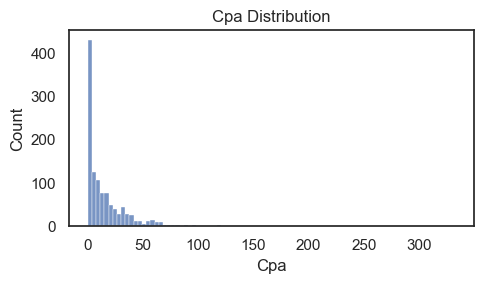

In [66]:
for i in df_corr.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(x=i, data=df)
    plt.title(f'{i} Distribution')
    plt.tight_layout()
    plt.show()

We can see that all our numerical values are skewed to the right. When it comes to CTR and CPC we can notice huge spikes at 0, and that is because the ad simply got no impressions or clicks.

We check for outliers.

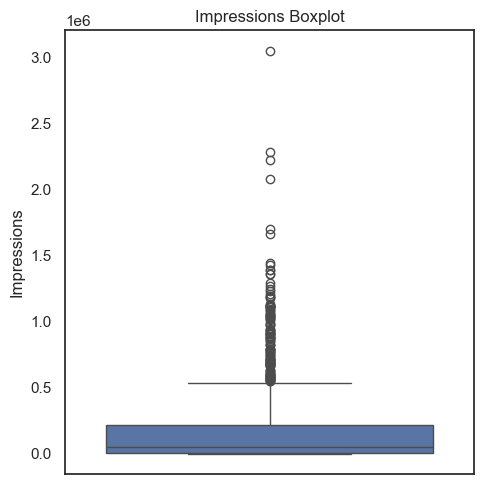

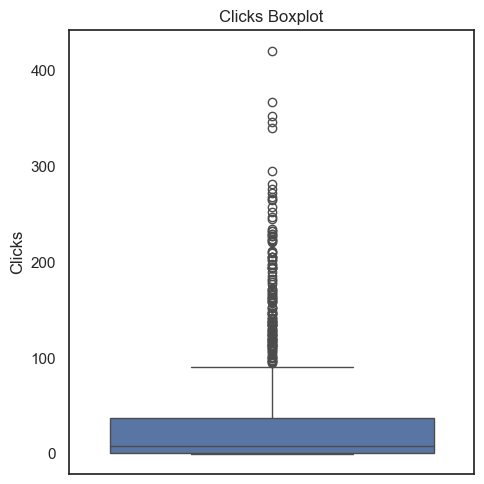

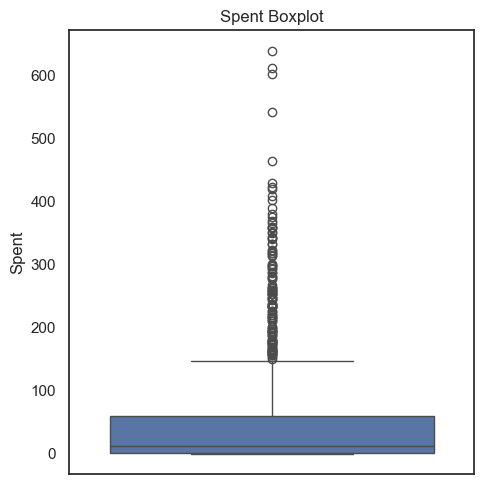

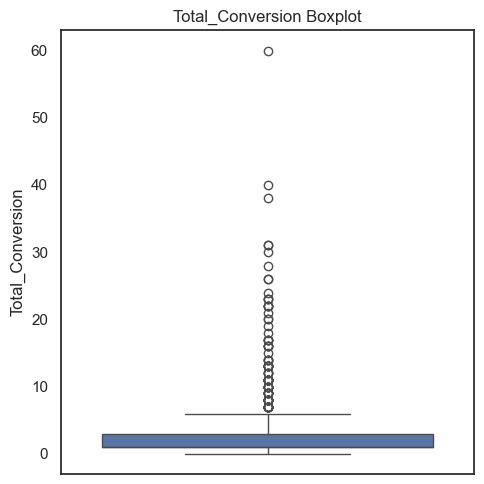

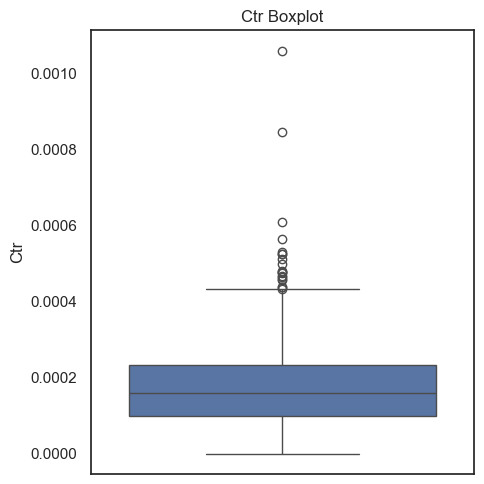

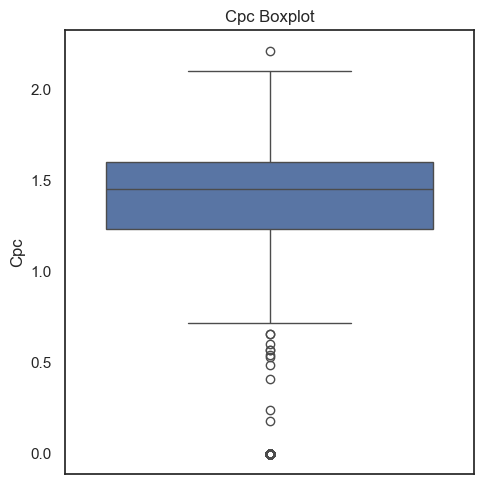

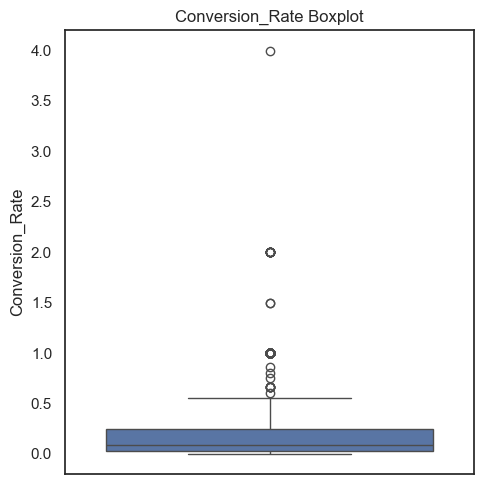

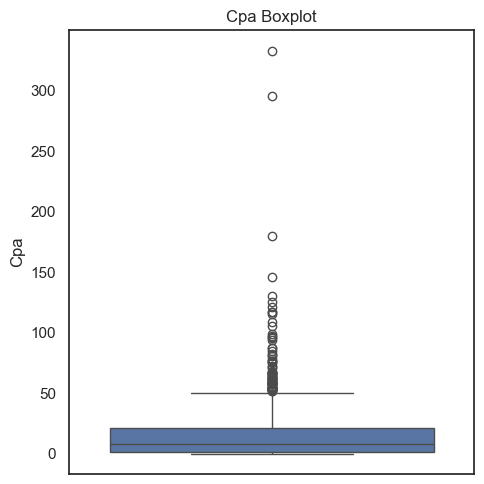

In [83]:
for i in df_corr.columns:
    plt.figure(figsize=(5, 5))
    sns.set_style('white')
    sns.boxplot(y=i, data=df)
    plt.title(f'{i} Boxplot')
    plt.tight_layout()

In [ ]:
for i in df_corr.columns:
    